# ***Configuração ambiente***

In [ ]:
# Instalacao pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 47 kB/s 
     |████████████████████████████████| 199 kB 57.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=9a9ff586ff0c21bdaf0cd91f96b9155c875aa1be8d6c114105b6d5cf52376ea8
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
# Iniciar sessão pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

spark = SparkSession.builder\
        .master("local") \
        .appName("Colab") \
        .config('spark.ui.port', '4050') \
        .getOrCreate()

sqlContext = SQLContext(spark.sparkContext)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
# Versão spark
spark

In [ ]:
# Versão python
!python --version

Python 3.8.16


In [ ]:
# Bibliotecas necessárias
from pyspark.sql import *
from pandas import *
from pyspark import SparkFiles
from pyspark.sql.types import StringType, DateType, FloatType
from pyspark.sql.functions import sum, col, desc, array_join, collect_list
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# ***Formula1.csv***

In [ ]:
# Bases
urls = ['https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/circuits.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/constructor_results.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/constructor_standings.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/constructors.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/driver_standings.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/drivers.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/lap_times.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/pit_stops.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/qualifying.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/races.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/results.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/seasons.csv',
        'https://raw.githubusercontent.com/aureliolucassilva/data_science/main/formula1/status.csv']

# Inicializar arquivos na sessão Spark
for i in range(13):
  spark.sparkContext.addFile(urls[i])

# Dataframes
circuitos = spark.read.csv(SparkFiles.get("circuits.csv"), inferSchema=True, header=True)
construtoresResultados = spark.read.csv(SparkFiles.get("constructor_results.csv"), inferSchema=True, header=True)
construtoresClassificacao = spark.read.csv(SparkFiles.get("constructor_standings.csv"), inferSchema=True, header=True)
construtores = spark.read.csv(SparkFiles.get("constructors.csv"), inferSchema=True, header=True)
pilotosClassificacao = spark.read.csv(SparkFiles.get("driver_standings.csv"), inferSchema=True, header=True)
pilotos = spark.read.csv(SparkFiles.get("drivers.csv"), inferSchema=True, header=True)
tempoVoltas = spark.read.csv(SparkFiles.get("lap_times.csv"), inferSchema=True, header=True)
paradas = spark.read.csv(SparkFiles.get("pit_stops.csv"), inferSchema=True, header=True)
classificacao = spark.read.csv(SparkFiles.get("qualifying.csv"), inferSchema=True, header=True)
corridas = spark.read.csv(SparkFiles.get("races.csv"), inferSchema=True, header=True)
resultados = spark.read.csv(SparkFiles.get("results.csv"), inferSchema=True, header=True)
status = spark.read.csv(SparkFiles.get("status.csv"), inferSchema=True, header=True)

# TempViews
pilotos.createOrReplaceTempView("tempPilotos")
circuitos.createOrReplaceTempView("tempCircuitos")
construtoresResultados.createOrReplaceTempView("tempConstrutoresResultados")
construtores.createOrReplaceTempView("tempConstrutores")
pilotosClassificacao.createOrReplaceTempView("tempPilotosClassificacao")
tempoVoltas.createOrReplaceTempView("tempTempoVoltas")
paradas.createOrReplaceTempView("tempParadas")
classificacao.createOrReplaceTempView("tempClassificacao")
resultados.createOrReplaceTempView("tempResultados")
corridas.createOrReplaceTempView("tempCorridas")
status.createOrReplaceTempView("tempStatus")

In [ ]:
# Amostras
print('Pilotos')
pilotos.show(5, False)
print('Circuitos')
circuitos.show(5, False)
print('Construtores Resultados')
construtoresResultados.show(5, False)
print('Construtores')
construtores.show(5, False)
print('Pilotos Classificação')
pilotosClassificacao.show(5, False)
print('Tempo Voltas')
tempoVoltas.show(5, False)
print('Paradas')
paradas.show(5, False)
print('Classificacao')
classificacao.show(5, False)
print('Resultados')
resultados.show(5, False)
print('Corridas')
corridas.show(5, False)
print('Status')
status.show(5, False)

Pilotos
+--------+----------+------+----+--------+----------+-------------------+-----------+----------------------------------------------+
|driverId|driverRef |number|code|forename|surname   |dob                |nationality|url                                           |
+--------+----------+------+----+--------+----------+-------------------+-----------+----------------------------------------------+
|1       |hamilton  |44    |HAM |Lewis   |Hamilton  |1985-01-07 00:00:00|British    |http://en.wikipedia.org/wiki/Lewis_Hamilton   |
|2       |heidfeld  |\N    |HEI |Nick    |Heidfeld  |1977-05-10 00:00:00|German     |http://en.wikipedia.org/wiki/Nick_Heidfeld    |
|3       |rosberg   |6     |ROS |Nico    |Rosberg   |1985-06-27 00:00:00|German     |http://en.wikipedia.org/wiki/Nico_Rosberg     |
|4       |alonso    |14    |ALO |Fernando|Alonso    |1981-07-29 00:00:00|Spanish    |http://en.wikipedia.org/wiki/Fernando_Alonso  |
|5       |kovalainen|\N    |KOV |Heikki  |Kovalainen|1981-10-

In [ ]:
# Fontes texto
fonteTitulo = {'family':'serif','color':'black','size':14, 'style':'italic'}
fonteEixo = {'family':'serif','color':'black','size':12}

# ***Pilotos***

## ***Idade***

In [ ]:
# Schema pilotos
pilotos.printSchema()

root
 |-- driverId: integer (nullable = true)
 |-- driverRef: string (nullable = true)
 |-- number: string (nullable = true)
 |-- code: string (nullable = true)
 |-- forename: string (nullable = true)
 |-- surname: string (nullable = true)
 |-- dob: timestamp (nullable = true)
 |-- nationality: string (nullable = true)
 |-- url: string (nullable = true)



In [ ]:
# Converter coluna dob (Date of Birth) para tipo date
pilotos = pilotos.withColumn("dob", pilotos["dob"].cast(DateType()))

In [ ]:
# Novo schema pilotos
pilotos.printSchema()

root
 |-- driverId: integer (nullable = true)
 |-- driverRef: string (nullable = true)
 |-- number: string (nullable = true)
 |-- code: string (nullable = true)
 |-- forename: string (nullable = true)
 |-- surname: string (nullable = true)
 |-- dob: date (nullable = true)
 |-- nationality: string (nullable = true)
 |-- url: string (nullable = true)



In [ ]:
# Média idade pilotos por temporada
queryIdade = """
                  SELECT DISTINCT year AS temporada,
                                  ROUND(AVG(age)) AS media_idade
                  FROM 
                  (
                      SELECT A.forename,
                             A.surname,
                             C.year,
                             C.year - year(A.dob) AS age
                      FROM tempPilotos A
                      INNER JOIN tempPilotosClassificacao B
                      ON A.driverId = B.driverId
                      INNER JOIN tempCorridas C
                      ON B.raceId = C.raceId
                  )
                  GROUP BY year
                  ORDER BY temporada ASC
             """

pilotosIdade = spark.sql(queryIdade)
pilotosIdade.show()

+---------+-----------+
|temporada|media_idade|
+---------+-----------+
|     1950|       37.0|
|     1951|       37.0|
|     1952|       36.0|
|     1953|       35.0|
|     1954|       34.0|
|     1955|       35.0|
|     1956|       35.0|
|     1957|       33.0|
|     1958|       34.0|
|     1959|       33.0|
|     1960|       33.0|
|     1961|       31.0|
|     1962|       31.0|
|     1963|       32.0|
|     1964|       32.0|
|     1965|       31.0|
|     1966|       32.0|
|     1967|       32.0|
|     1968|       32.0|
|     1969|       32.0|
+---------+-----------+
only showing top 20 rows



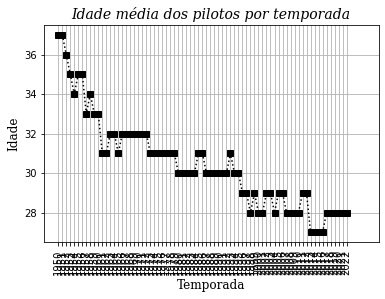

In [ ]:
# Visualização
mediaIdade = pilotosIdade.collect()

x = []
y = []

for registro in mediaIdade:
    x.append(registro[0])
    y.append(registro[1])

plt.plot(x,y, 's:k')
plt.xticks(np.arange(min(x), max(x)+10, 10))
plt.xlabel('Temporada',  fontdict = fonteEixo)
plt.ylabel('Idade',  fontdict = fonteEixo)
plt.xticks(x, rotation=90)
plt.grid(True)
plt.title('Idade média dos pilotos por temporada', fontdict = fonteTitulo)
plt.rcParams["figure.figsize"] = (18,14)
plt.grid(True)
plt.show()

***Piloto mais jovem a disputar cada temporada***

In [ ]:
# Piloto mais jovem por temporada
queryIdadePilotos = """
                          SELECT  DISTINCT A.driverId,
                                           A.forename,
                                           A.surname,
                                           C.year,
                                           C.year - year(A.dob) AS age
                          FROM tempPilotos A
                          INNER JOIN tempPilotosClassificacao B
                          ON A.driverId = B.driverId
                          INNER JOIN tempCorridas C
                          ON B.raceId = C.raceId
                    """
pilotosIdade = spark.sql(queryIdadePilotos)
pilotosIdade.createOrReplaceTempView("tempPilotosIdade")

queryJovem = """
                  SELECT forename AS nome,
                         surname AS sobrenome,
                         A.age AS idade,
                         A.year AS temporada
                  FROM tempPilotosIdade A
                  INNER JOIN 
                  (
                      SELECT year,
                             MIN(age) AS age
                      FROM tempPilotosIdade 
                      GROUP BY year
                  ) B
                  ON (A.year = B.year AND A.age = B.age)
                  ORDER BY A.year
             """

jovensPilotos = spark.sql(queryJovem)
jovensPilotos.show()

+-----------+-----------+-----+---------+
|       nome|  sobrenome|idade|temporada|
+-----------+-----------+-----+---------+
|       Troy|    Ruttman|   20|     1950|
|       Troy|    Ruttman|   21|     1951|
|      Peter|    Collins|   21|     1952|
|      Jimmy|    Stewart|   22|     1953|
|      Peter|    Collins|   22|     1953|
|      Peter|    Collins|   23|     1954|
|     Cesare|    Perdisa|   23|     1955|
|      Billy|    Garrett|   23|     1956|
|Carel Godin|de Beaufort|   23|     1957|
|      Bruce|    McLaren|   21|     1958|
|      Keith|     Greene|   21|     1959|
|      Fritz|     d'Orey|   21|     1959|
|      Keith|     Greene|   22|     1960|
|    Ricardo|  Rodríguez|   19|     1961|
|    Ricardo|  Rodríguez|   20|     1962|
|     Thomas|    Monarch|   18|     1963|
|      Chris|       Amon|   21|     1964|
|       Alan|  Rollinson|   22|     1965|
|      Chris|       Amon|   22|     1965|
|      Chris|       Amon|   23|     1966|
+-----------+-----------+-----+---

## ***Nacionalidade***

In [ ]:
# Nacionalidades Pilotos
total_pilots = pilotos.count()

queryNacionalidade = """
                        SELECT nationality AS nacionalidade,
                               number_of_pilots AS num_pilotos,
                               round(100 * (number_of_pilots/{0}), 2) AS `%`
                        FROM 
                        (
                            SELECT nationality,
                                   COUNT(*) AS number_of_pilots
                            FROM tempPilotos 
                            GROUP BY nationality
                        )
                        ORDER BY number_of_pilots desc
                     """.format(total_pilots)

pilotosNacionalidade = spark.sql(queryNacionalidade)
pilotosNacionalidade.show()

+-------------+-----------+-----+
|nacionalidade|num_pilotos|    %|
+-------------+-----------+-----+
|      British|        165| 19.3|
|     American|        157|18.36|
|      Italian|         99|11.58|
|       French|         73| 8.54|
|       German|         50| 5.85|
|    Brazilian|         32| 3.74|
|    Argentine|         24| 2.81|
|        Swiss|         23| 2.69|
|      Belgian|         23| 2.69|
|South African|         23| 2.69|
|     Japanese|         20| 2.34|
|        Dutch|         18| 2.11|
|   Australian|         17| 1.99|
|     Austrian|         15| 1.75|
|      Spanish|         15| 1.75|
|     Canadian|         14| 1.64|
|      Swedish|         10| 1.17|
|      Finnish|          9| 1.05|
|New Zealander|          9| 1.05|
|      Mexican|          6|  0.7|
+-------------+-----------+-----+
only showing top 20 rows



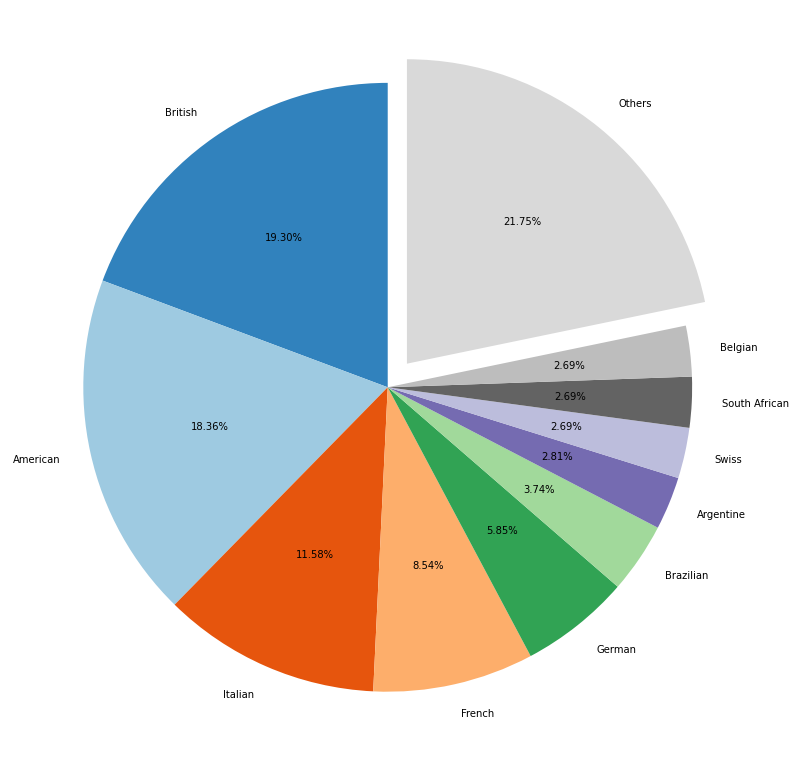

In [ ]:
# Visualização
top10_nacionalidades = pilotosNacionalidade.limit(10).collect()
nacionalidades = []
porcentagem = []
othersRatio = 100

for nacionalidade in top10_nacionalidades:
    nacionalidades.append(nacionalidade[0])
    porcentagem.append(nacionalidade[2])
    othersRatio -= nacionalidade[2]

nacionalidades.append('Others')
porcentagem.append(othersRatio)

plt.pie(porcentagem, 
        labels=nacionalidades, 
        startangle=90,
        explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1),
        colors=cm.tab20c(np.arange(50)/10.),
        autopct = '%1.2f%%')
plt.rcParams["figure.figsize"] = (18,14)
plt.show()

***Distribuição das outras nacionalidades (21.68%), que estão abaixo do top 10***

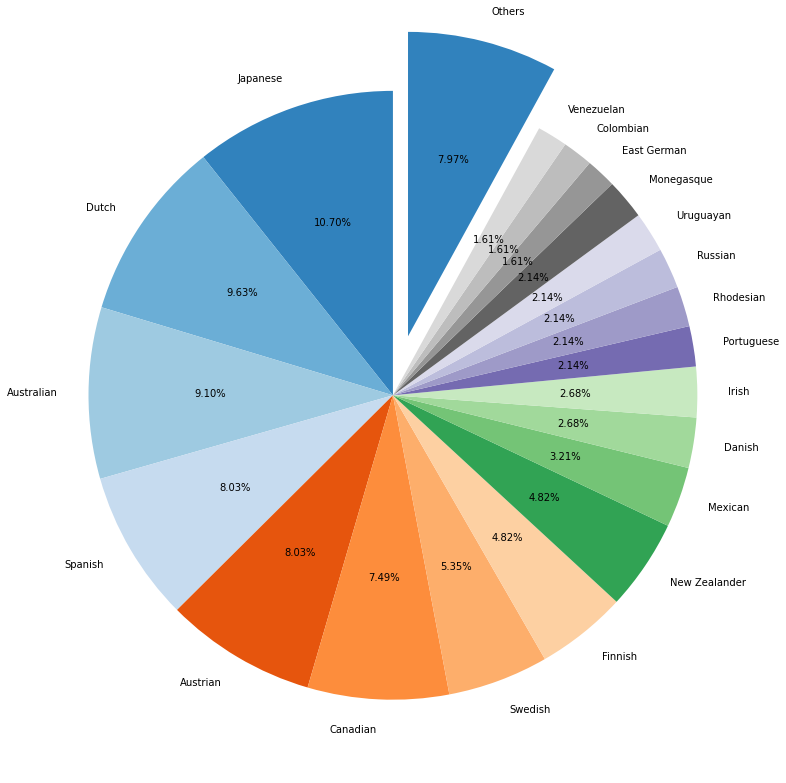

In [ ]:
# Visualização
outrosNacionalidade = pilotosNacionalidade.filter(col('%') < 2.69).orderBy(col('%').desc()).limit(20).collect()
numeroFatias = [0] * 20
numeroFatias.append(0.2)
othersRatio = 100

nacionalidades = []
porcentagem = []

for nacionalidade in outrosNacionalidade:
    nacionalidades.append(nacionalidade[0])
    newRatio = (nacionalidade[1]/(total_pilots * 0.2186))*100
    porcentagem.append(newRatio)
    othersRatio -= newRatio

nacionalidades.append('Others')
porcentagem.append(othersRatio)

plt.pie(porcentagem, 
        labels=nacionalidades, 
        startangle=90,
        explode = numeroFatias,
        colors=cm.tab20c(np.arange(20)),
        autopct = '%1.2f%%')
plt.rcParams["figure.figsize"] = (18,14)
plt.show()

## ***Desempenho por Temporada***

In [ ]:
# Pontos na temporada de cada Piloto
queryTemporada = """
                   SELECT year AS temporada,
                          A.driverId AS pilotoId,
                          CONCAT(C.forename, ' ', C.surname) AS piloto,
                          C.nationality AS nacionalidade,
                          total_points AS total_pontos
                   FROM 
                   (  
                        SELECT  B.year,
                                A.driverId,
                                SUM(points) AS total_points
                        FROM tempPilotosClassificacao A
                        INNER JOIN tempCorridas B
                        ON A.raceId = B.raceId
                        GROUP BY A.driverId, B.year
                   ) A
                   INNER JOIN tempPilotos C
                   ON A.driverId = C.driverId
                   ORDER BY A.year ASC, total_points DESC
                 """

pontosPilotos = spark.sql(queryTemporada)
pontosPilotos.show()

+---------+--------+------------------+-------------+------------+
|temporada|pilotoId|            piloto|nacionalidade|total_pontos|
+---------+--------+------------------+-------------+------------+
|     1950|     642|       Nino Farina|      Italian|       119.0|
|     1950|     579|       Juan Fangio|    Argentine|        97.0|
|     1950|     786|     Luigi Fagioli|      Italian|        96.0|
|     1950|     627|      Louis Rosier|       French|        45.0|
|     1950|     647|    Alberto Ascari|      Italian|        45.0|
|     1950|     593|   Johnnie Parsons|     American|        45.0|
|     1950|     701|      Bill Holland|     American|        30.0|
|     1950|     686|       Reg Parnell|      British|        28.0|
|     1950|     589|      Louis Chiron|   Monegasque|        24.0|
|     1950|     669|       Prince Bira|         Thai|        24.0|
|     1950|     704|    Yves Cabantous|       French|        21.0|
|     1950|     768|        Mauri Rose|     American|        2

In [ ]:
# Campeões
pontosPilotos.createOrReplaceTempView("tempPontosPilotos")

queryCampeoes = """
                    SELECT pilotoId,
                           piloto AS campeao,
                           nacionalidade,
                           A.total_pontos,
                           A.temporada
                    FROM 
                    (
                        SELECT temporada,
                               MAX(total_pontos) AS total_pontos
                        FROM tempPontosPilotos
                        GROUP BY temporada
                    ) A
                    INNER JOIN tempPontosPilotos B
                    ON (A.total_pontos = B.total_pontos AND A.temporada = B.temporada)
                    WHERE A.temporada <> 2022
                    ORDER BY temporada
                """

campeoesPilotos = spark.sql(queryCampeoes)
campeoesPilotos.show()

+--------+------------------+-------------+------------+---------+
|pilotoId|           campeao|nacionalidade|total_pontos|temporada|
+--------+------------------+-------------+------------+---------+
|     642|       Nino Farina|      Italian|       119.0|     1950|
|     579|       Juan Fangio|    Argentine|       149.0|     1951|
|     647|    Alberto Ascari|      Italian|       162.0|     1952|
|     647|    Alberto Ascari|      Italian|       224.0|     1953|
|     579|       Juan Fangio|    Argentine|      248.28|     1954|
|     579|       Juan Fangio|    Argentine|       148.0|     1955|
|     579|       Juan Fangio|    Argentine|       133.5|     1956|
|     579|       Juan Fangio|    Argentine|       206.0|     1957|
|     475|     Stirling Moss|      British|       242.0|     1958|
|     356|      Jack Brabham|   Australian|       195.0|     1959|
|     360|     Bruce McLaren|New Zealander|       221.0|     1960|
|     476|Wolfgang von Trips|       German|       177.0|     1

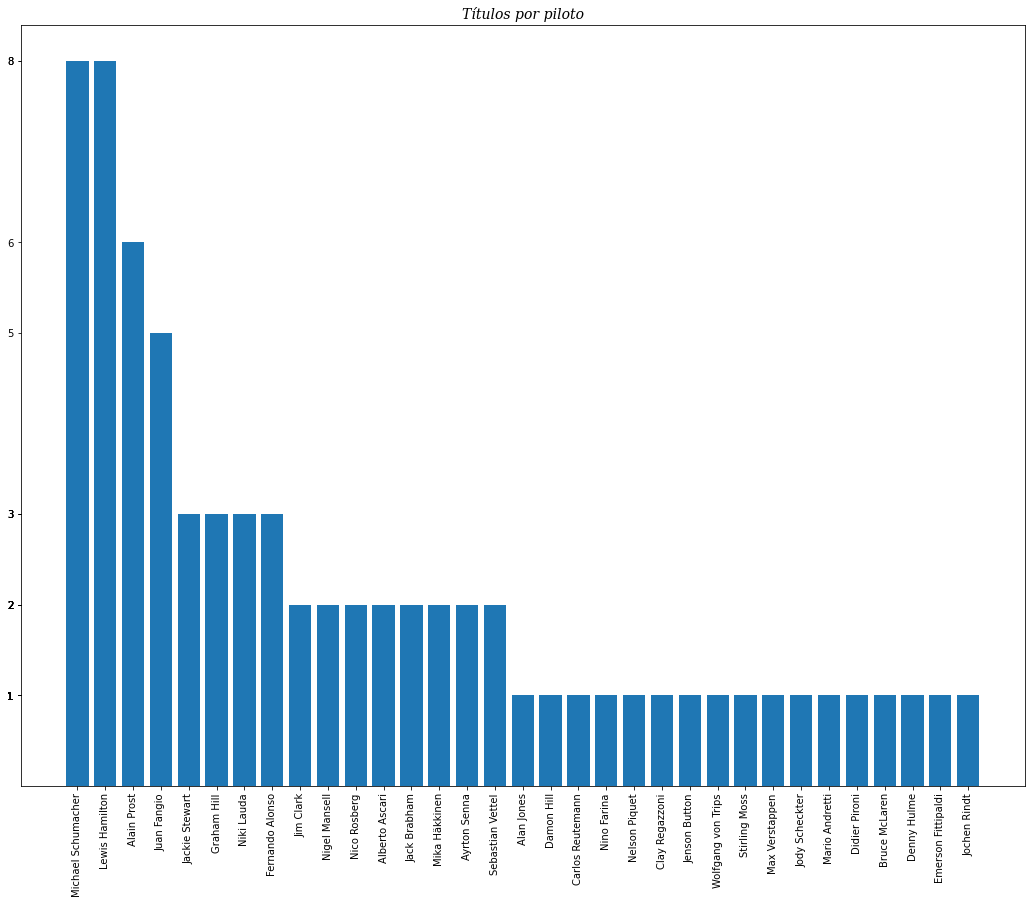

In [ ]:
# Visualização
campeoesPilotos.createOrReplaceTempView("tempCampeosPilotos")
queryNumeroTitulos = """
                        SELECT campeao,
                               COUNT(*) AS titulos
                        FROM tempCampeosPilotos
                        GROUP BY campeao
                        ORDER BY titulos DESC
                     """

pilotosNumeroTitulos = spark.sql(queryNumeroTitulos)
x = pilotosNumeroTitulos.select('campeao').rdd.flatMap(lambda x: x).collect()
y = pilotosNumeroTitulos.select('titulos').rdd.flatMap(lambda x: x).collect()
plt.bar(x,y)
plt.xticks(x, rotation=90)
plt.yticks(y)
plt.title('Títulos por piloto', fontdict=fonteTitulo)
plt.show()

***Vice campeão e terceiro colocado de cada temporada***

In [ ]:
# Vice e terceiro colocados
queryVice =   """
                  SELECT A.temporada, 
                         pilotoId,
                         piloto,
                         nacionalidade,
                         A.total_pontos,
                         posicao
                  FROM 
                  (
                    SELECT temporada,
                           total_pontos,
                           ROW_NUMBER() OVER(PARTITION BY temporada ORDER BY total_pontos DESC) AS posicao
                    FROM tempPontosPilotos  
                    ORDER BY total_pontos DESC
                  ) A
                  INNER JOIN tempPontosPilotos B
                  ON A.temporada = B.temporada AND A.total_pontos = B.total_pontos
                  WHERE posicao IN(2, 3)
                  ORDER BY temporada, posicao
              """

vicePilotos = spark.sql(queryVice)
vicePilotos.show()

+---------+--------+--------------------+-------------+------------+-------+
|temporada|pilotoId|              piloto|nacionalidade|total_pontos|posicao|
+---------+--------+--------------------+-------------+------------+-------+
|     1950|     579|         Juan Fangio|    Argentine|        97.0|      2|
|     1950|     786|       Luigi Fagioli|      Italian|        96.0|      3|
|     1951|     642|         Nino Farina|      Italian|       100.0|      2|
|     1951|     647|      Alberto Ascari|      Italian|        91.0|      3|
|     1952|     641|       Piero Taruffi|      Italian|       125.0|      2|
|     1952|     642|         Nino Farina|      Italian|        96.0|      3|
|     1953|     578|       Mike Hawthorn|      British|       104.0|      2|
|     1953|     642|         Nino Farina|      Italian|       102.0|      3|
|     1954|     498|José Froilán Gonz...|    Argentine|       129.2|      2|
|     1954|     427| Maurice Trintignant|       French|        99.0|      3|

***Vice campeonatos por piloto***

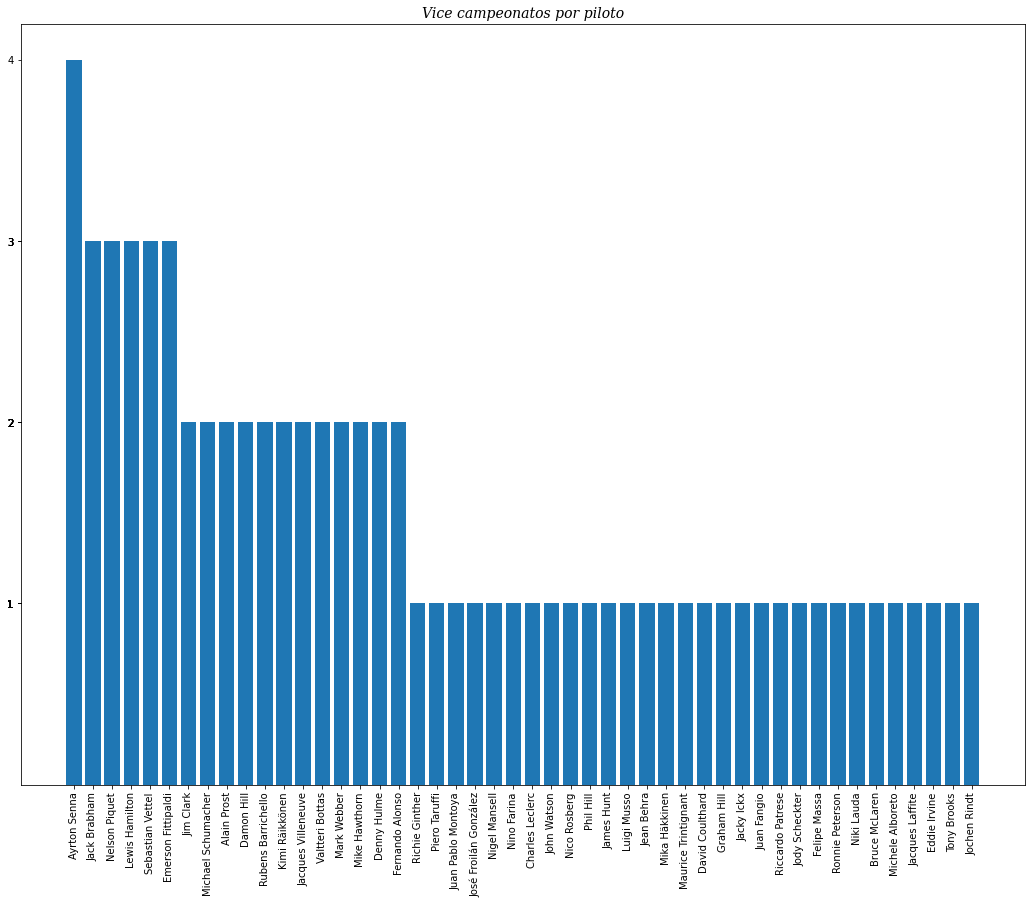

In [ ]:
# Visualização
vicePilotos.createOrReplaceTempView("tempVicePilotos")
queryViceCampeonatos = """
                          SELECT piloto,
                                 COUNT(*) AS segundos_lugares
                          FROM tempVicePilotos
                          WHERE posicao = 2
                          GROUP BY piloto
                          ORDER BY segundos_lugares DESC
                       """

pilotosViceCampeonatos = spark.sql(queryViceCampeonatos)
x = pilotosViceCampeonatos.select('piloto').rdd.flatMap(lambda x: x).collect()
y = pilotosViceCampeonatos.select('segundos_lugares').rdd.flatMap(lambda x: x).collect()
plt.bar(x,y)
plt.xticks(x, rotation=90)
plt.yticks(y)
plt.title('Vice campeonatos por piloto', fontdict=fonteTitulo)
plt.show()

## ***Pilotos brasileiros***

In [ ]:
# Brasileiros
queryBrasil = """
                  SELECT CONCAT(B.forename, ' ', B.surname) AS piloto,
                         C.name AS circuito,
                         C.date AS data,
                         A.position AS posicao,
                         A.points AS pontos
                  FROM tempPilotosClassificacao A
                  INNER JOIN tempPilotos B
                  ON (A.driverId = B.driverId)
                  INNER JOIN tempCorridas C
                  ON A.raceId = C.raceId
                  WHERE B.nationality = 'Brazilian'
                  ORDER BY C.date
              """

desempenhoBrasileiros = spark.sql(queryBrasil)
print('Pilotos brasileiros')
desempenhoBrasileiros.select('piloto').distinct().show()
print('Histórico brasileiro')
desempenhoBrasileiros.show()

Pilotos brasileiros
+--------------------+
|              piloto|
+--------------------+
|        Alex Ribeiro|
|         Gino Bianco|
|         Felipe Nasr|
|   Maurício Gugelmin|
|  Rubens Barrichello|
|  Cristiano da Matta|
|Christian Fittipaldi|
|         Pedro Diniz|
|         Raul Boesel|
|       Nelson Piquet|
|          Luiz Bueno|
|      Ricardo Rosset|
|        Fritz d'Orey|
|       Ricardo Zonta|
|    Enrique Bernoldi|
|         Chico Landi|
|       Ingo Hoffmann|
|   Nelson Piquet Jr.|
|       Luciano Burti|
|        Ayrton Senna|
+--------------------+
only showing top 20 rows

Histórico brasileiro
+--------------------+--------------------+-------------------+-------+------+
|              piloto|            circuito|               data|posicao|pontos|
+--------------------+--------------------+-------------------+-------+------+
|         Chico Landi|  Italian Grand Prix|1951-09-16 00:00:00|     62|   0.0|
|         Chico Landi|  Spanish Grand Prix|1951-10-28 00:00:00|  

***Desempenho brasileiros por temporada***

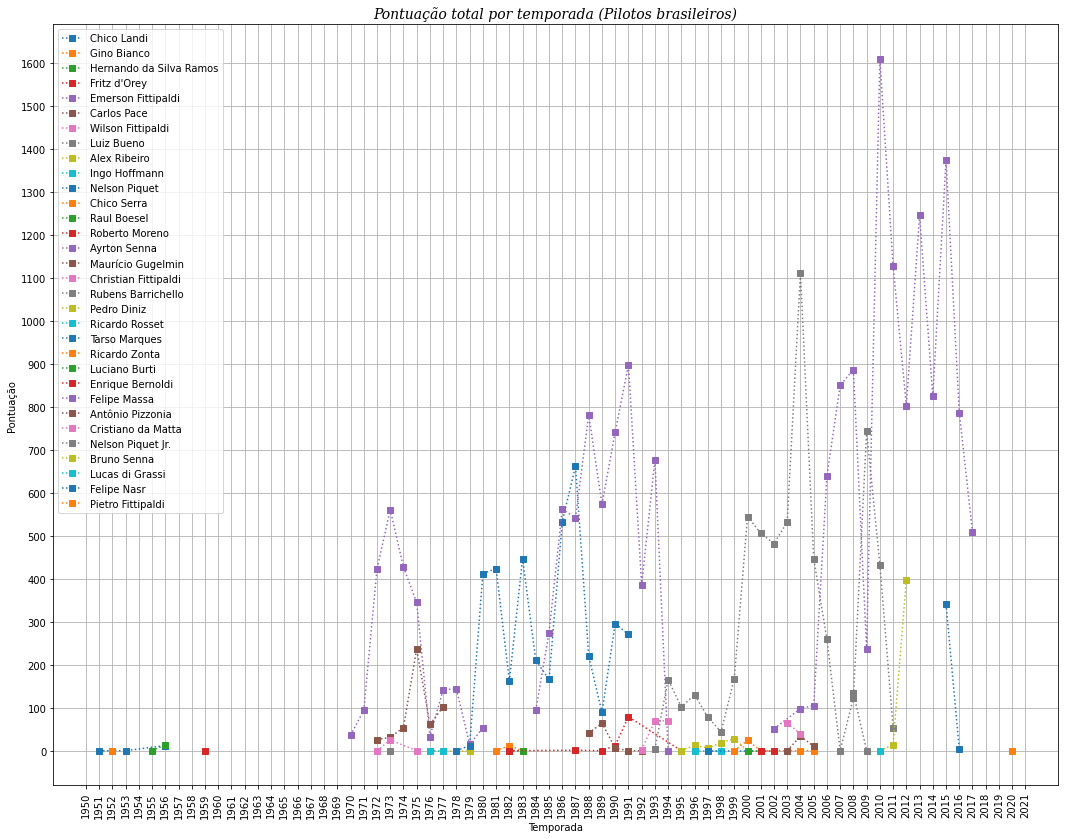

In [ ]:
# Visualização 
desempenhoBrasileiros.createOrReplaceTempView("tempDesempenhoBrasileiros") 

queryPontuacaoBrasileiro = """
                                SELECT piloto,
                                       INT(SUBSTR(data, 0, 4)) AS temporada,
                                       SUM(pontos) AS total_pontos
                                FROM tempDesempenhoBrasileiros
                                GROUP BY piloto, INT(SUBSTR(data, 0, 4))
                                ORDER BY temporada, piloto
                           """

pontuacaoBrasileiros = spark.sql(queryPontuacaoBrasileiro)

x = {}
y = {}

for registro in pontuacaoBrasileiros.collect():
  piloto = registro[0]
  if piloto in x:
    x[piloto].append(registro[1])
  else: 
    x[piloto] = [registro[1]]

  if piloto in y:
    y[piloto].append(registro[2])
  else: 
    y[piloto] = [registro[2]]
  
for piloto in x:
  plt.plot(x[piloto], y[piloto], 's:', label = piloto)

plt.xlabel('Temporada')
plt.ylabel('Pontuação')
plt.title('Pontuação total por temporada (Pilotos brasileiros)', fontdict=fonteTitulo)
plt.legend()
plt.xticks(range(1950, 2022, 1), rotation=90)
plt.yticks(range(0, 1700, 100))
plt.rcParams["figure.figsize"] = (18,14)
plt.grid(True)
plt.show()

***Classificação brasileiros por temporada***

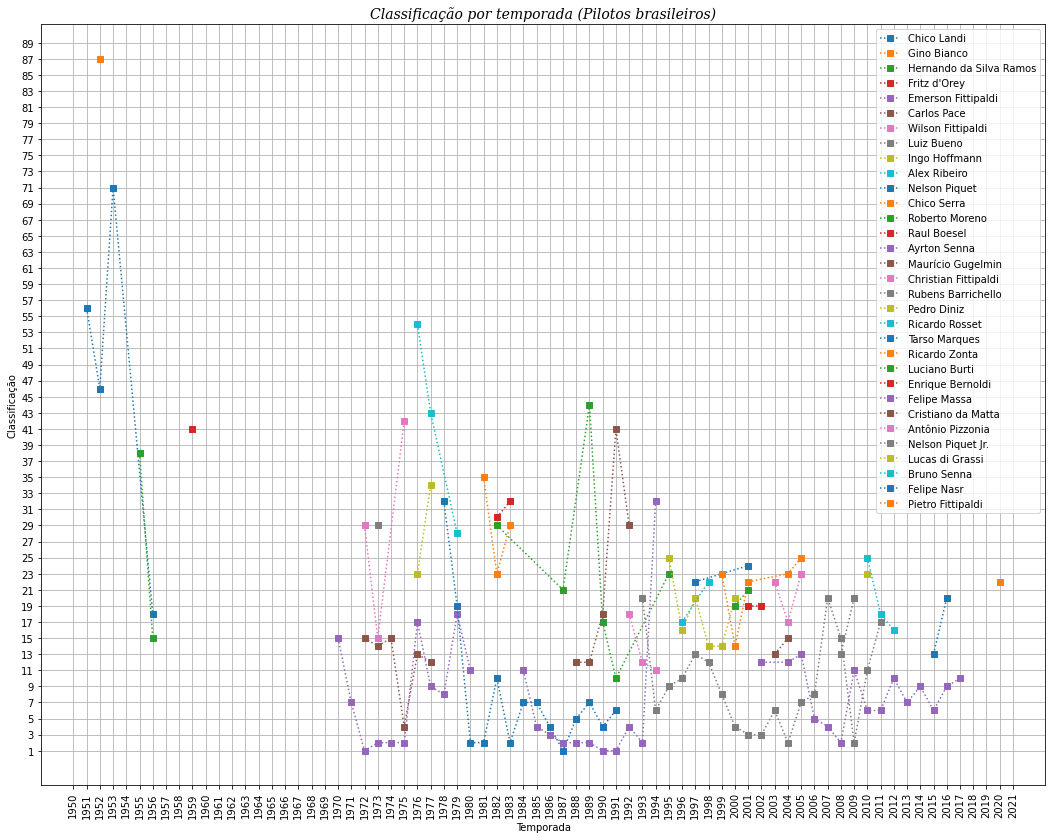

In [ ]:
# Classificação brasileiros
queryClassificacaoBrasileiros =   """
                                        SELECT DISTINCT A.temporada, 
                                                        piloto,
                                                        nacionalidade,
                                                        A.total_pontos,
                                                        posicao
                                        FROM 
                                        (
                                            SELECT pilotoId,
                                                   temporada,
                                                   total_pontos,
                                                   ROW_NUMBER() OVER(PARTITION BY temporada ORDER BY total_pontos DESC) AS posicao
                                            FROM tempPontosPilotos  
                                            ORDER BY total_pontos DESC
                                        ) A
                                        INNER JOIN tempPontosPilotos B
                                        ON(A.temporada = B.temporada AND A.total_pontos = B.total_pontos AND A.pilotoId = B.pilotoId)
                                        WHERE nacionalidade = 'Brazilian'
                                        ORDER BY temporada, posicao
                                 """

classificacaoBrasileiros = spark.sql(queryClassificacaoBrasileiros)

x = {}
y = {}

for registro in classificacaoBrasileiros.collect():
  piloto = registro[1]
  if piloto in x:
    x[piloto].append(registro[0])
  else: 
    x[piloto] = [registro[0]]

  if piloto in y:
    y[piloto].append(registro[4])
  else: 
    y[piloto] = [registro[4]]
  
for piloto in x:
  plt.plot(x[piloto], y[piloto], 's:', label = piloto)

plt.xlabel('Temporada')
plt.ylabel('Classificação')
plt.title('Classificação por temporada (Pilotos brasileiros)', fontdict=fonteTitulo)
plt.legend()
plt.xticks(range(1950, 2022, 1), rotation=90)
plt.yticks(range(1, 90, 2))
plt.rcParams["figure.figsize"] = (18,14)
plt.grid(True)
plt.show()

***Número de pódios por piloto***

In [ ]:
# 1º Lugar
primeiroColocados = desempenhoBrasileiros.select('piloto') \
                                         .filter(col("posicao") == 1) \
                                         .groupBy('piloto') \
                                         .count() \
                                         .withColumnRenamed('count', '1º Lugar')
primeiroColocados.show()

+------------------+--------+
|            piloto|1º Lugar|
+------------------+--------+
|     Nelson Piquet|      19|
|      Ayrton Senna|      48|
|      Felipe Massa|       2|
|Emerson Fittipaldi|      28|
+------------------+--------+



In [ ]:
# 2º Lugar
segundoColocados = desempenhoBrasileiros.select('piloto') \
                                        .filter(col("posicao") == 2) \
                                        .groupBy('piloto') \
                                        .count() \
                                        .withColumnRenamed('count', '2º Lugar') 

segundoColocados.show()

+------------------+--------+
|            piloto|2º Lugar|
+------------------+--------+
|Rubens Barrichello|      42|
|     Nelson Piquet|      31|
|      Ayrton Senna|      42|
|      Felipe Massa|      12|
|       Carlos Pace|       5|
|Emerson Fittipaldi|      12|
+------------------+--------+



In [ ]:
# 3º Lugar
terceiroColocados = desempenhoBrasileiros.select('piloto') \
                                         .filter(col("posicao") == 3) \
                                         .groupBy('piloto') \
                                         .count() \
                                         .withColumnRenamed('count', '3º Lugar')

terceiroColocados.show()

+------------------+--------+
|            piloto|3º Lugar|
+------------------+--------+
| Maurício Gugelmin|       1|
|Rubens Barrichello|      20|
|     Nelson Piquet|      20|
|      Ayrton Senna|      22|
|      Felipe Massa|      16|
|       Carlos Pace|       2|
|Emerson Fittipaldi|      12|
+------------------+--------+



***Distribuição das demais colocações entre os pilotos***

In [ ]:
# 4º lugar em diante
outrosClassificacao = desempenhoBrasileiros.select('piloto', 'posicao') \
                                           .filter(col("posicao") > 3) \
                                           .groupBy('piloto', 'posicao') \
                                           .count() \
                                           .orderBy(col('piloto').asc(), col('posicao').asc()) \
                                           .withColumnRenamed('count', 'nº Lugar')

outrosClassificacao.show()

+----------------+-------+--------+
|          piloto|posicao|nº Lugar|
+----------------+-------+--------+
|    Alex Ribeiro|     11|       1|
|    Alex Ribeiro|     17|       1|
|    Alex Ribeiro|     21|       1|
|    Alex Ribeiro|     23|       1|
|    Alex Ribeiro|     24|       2|
|    Alex Ribeiro|     25|       1|
|    Alex Ribeiro|     26|       3|
|    Alex Ribeiro|     27|       1|
|    Alex Ribeiro|     28|       1|
|    Alex Ribeiro|     32|       1|
|    Alex Ribeiro|     35|       2|
|    Alex Ribeiro|     36|       4|
|    Alex Ribeiro|     37|       1|
|    Alex Ribeiro|     38|       1|
|Antônio Pizzonia|     15|       6|
|Antônio Pizzonia|     17|       1|
|Antônio Pizzonia|     18|       8|
|Antônio Pizzonia|     19|       2|
|Antônio Pizzonia|     20|       2|
|Antônio Pizzonia|     21|       1|
+----------------+-------+--------+
only showing top 20 rows



## ***Ayrton Senna e Rubens Barrichello***

***Distribuição das posições alcançadas por Ayrton Senna em sua carreira***

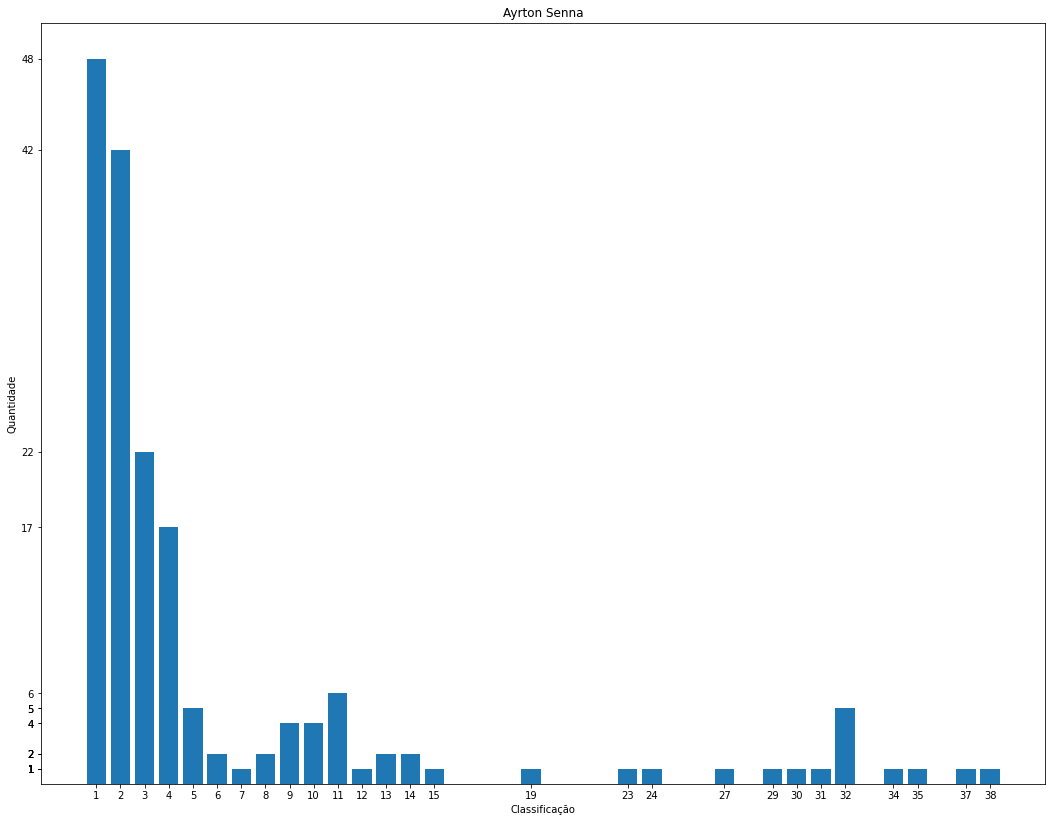

In [ ]:
# Visualização
ayrton_senna = desempenhoBrasileiros.select('piloto', 'posicao') \
                                    .filter(col('piloto') == 'Ayrton Senna') \
                                    .groupBy('piloto', 'posicao') \
                                    .count() \
                                    .orderBy(col('piloto').asc(), col('posicao').asc()) \
                                    .withColumnRenamed('count', 'nº Lugar')

x = ayrton_senna.select('posicao').rdd.flatMap(lambda x: x).collect()
y = ayrton_senna.select('nº Lugar').rdd.flatMap(lambda x: x).collect()

plt.bar(x,y)
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.title('Ayrton Senna')
plt.xticks(x)
plt.yticks(y)
plt.show()

***Distribuição das posições alcançadas por Rubens Barrichello em sua carreira***

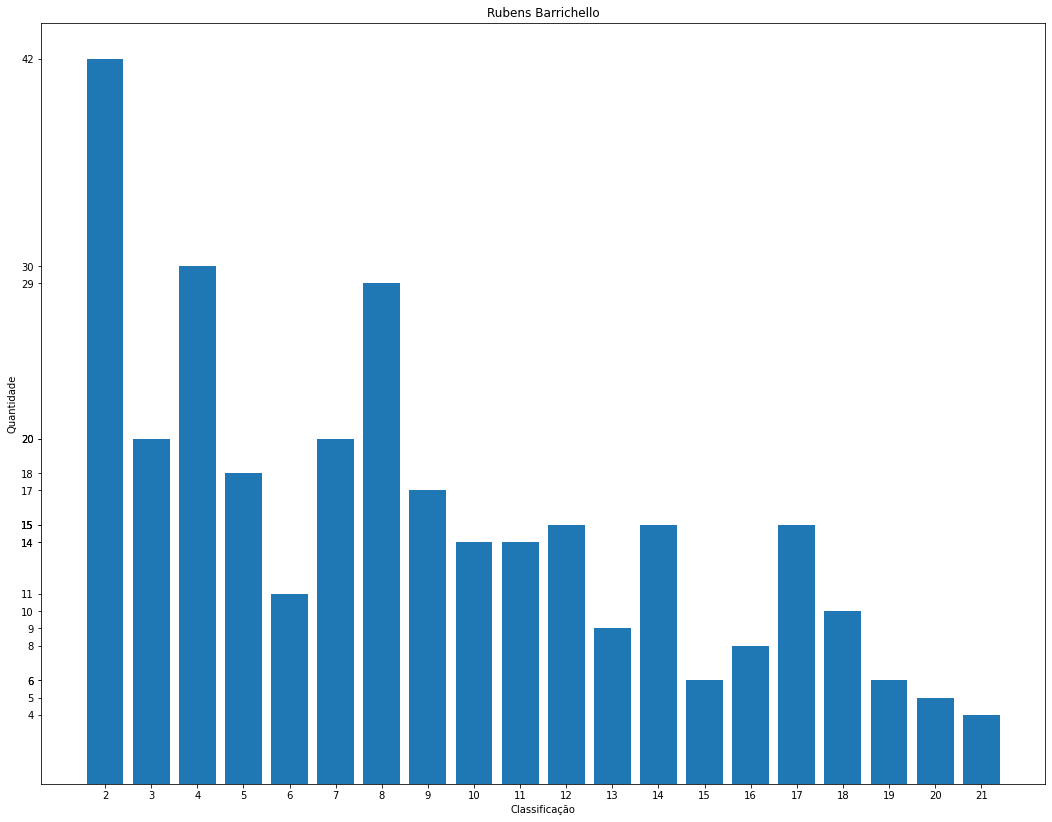

In [ ]:
# Visualização
rubens_barrichello = desempenhoBrasileiros.select('piloto', 'posicao') \
                                          .filter(col('piloto') == 'Rubens Barrichello') \
                                          .groupBy('piloto', 'posicao') \
                                          .count() \
                                          .orderBy(col('piloto').asc(), col('posicao').asc()) \
                                          .withColumnRenamed('count', 'nº Lugar')

x = rubens_barrichello.select('posicao').rdd.flatMap(lambda x: x).collect()
y = rubens_barrichello.select('nº Lugar').rdd.flatMap(lambda x: x).collect()

plt.bar(x,y)
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.title('Rubens Barrichello')
plt.xticks(x)
plt.yticks(y)
plt.show()

***Ayrton Senna: 1988, 1990 e 1991***

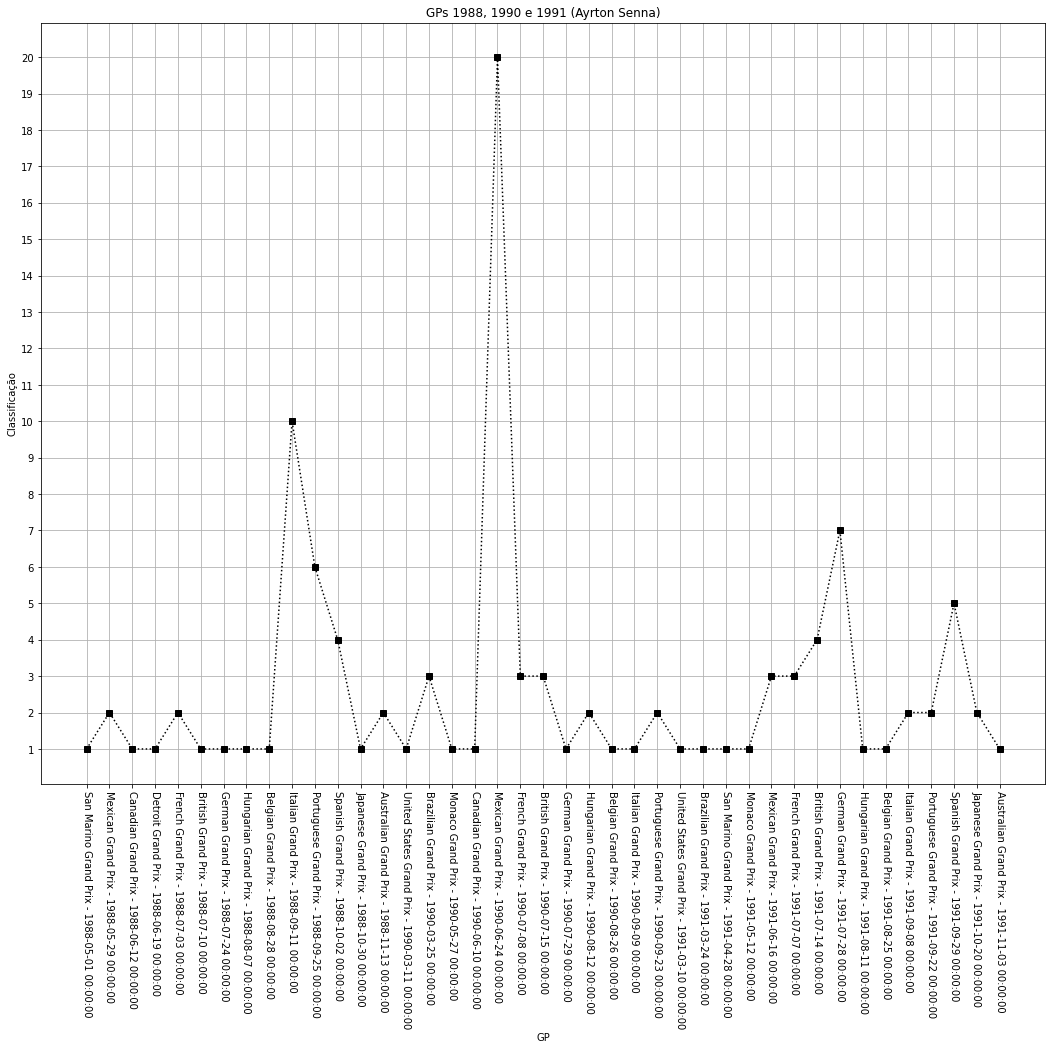

In [ ]:
# GPs
queryGpsAyrtonSenna = """ 
                          SELECT C.name || ' - ' || C.date AS GP,
                                 INT(A.position) AS position
                          FROM tempResultados A
                          INNER JOIN tempPilotos B
                          ON A.driverId = B.driverId
                          INNER JOIN tempCorridas C
                          ON A.raceId = C.raceId
                          WHERE B.forename = 'Ayrton' AND B.surname = 'Senna' 
                          AND position >= 1 
                          AND SUBSTR(C.date, 0, 4) IN ('1988', '1990', '1991') 
                          ORDER BY C.date, position
                      """

gpsAyrtonSenna = spark.sql(queryGpsAyrtonSenna)

y = gpsAyrtonSenna.select('position').rdd.flatMap(lambda x: x).collect()
x = gpsAyrtonSenna.select('GP').rdd.flatMap(lambda x: x).collect()

plt.plot(x, y, 's:k')
plt.xlabel('GP')
plt.ylabel('Classificação')
plt.title('GPs 1988, 1990 e 1991 (Ayrton Senna)')
plt.xticks(rotation=270)
plt.yticks(range(1, 21, 1), y.sort())
plt.rcParams["figure.figsize"] = (18,14)
plt.grid(True)
plt.show()

***Acidentes carreira Ayrton Senna***

In [ ]:
# Acidentes
resultados.join(status, status.statusId == resultados.statusId, 'inner') \
          .join(pilotos, pilotos.driverId == resultados.driverId, 'inner') \
          .join(corridas, corridas.raceId == resultados.raceId, 'inner') \
          .filter(((col('status') == 'Collision') | (col('status') == 'Accident')) & (col('forename') == 'Ayrton') & (col('surname') == 'Senna')) \
          .orderBy(col('date').asc()) \
          .select('name', 'date') \
          .withColumnRenamed('name', 'GP') \
          .withColumnRenamed('date', 'data') \
          .show()

+--------------------+-------------------+
|                  GP|               data|
+--------------------+-------------------+
|  Detroit Grand Prix|1984-06-24 00:00:00|
|   German Grand Prix|1984-08-05 00:00:00|
| European Grand Prix|1984-10-07 00:00:00|
|  Detroit Grand Prix|1985-06-23 00:00:00|
|   French Grand Prix|1985-07-07 00:00:00|
|   French Grand Prix|1986-07-06 00:00:00|
|  Belgian Grand Prix|1987-05-17 00:00:00|
|  Italian Grand Prix|1988-09-11 00:00:00|
|Portuguese Grand ...|1989-09-24 00:00:00|
|Australian Grand ...|1989-11-05 00:00:00|
| Japanese Grand Prix|1990-10-21 00:00:00|
|   French Grand Prix|1992-07-05 00:00:00|
|Australian Grand ...|1992-11-08 00:00:00|
|  Italian Grand Prix|1993-09-12 00:00:00|
|  Pacific Grand Prix|1994-04-17 00:00:00|
|San Marino Grand ...|1994-05-01 00:00:00|
+--------------------+-------------------+



***Morte Ayrton Senna***

In [ ]:
# Classificação San Marino Grand Prix 1994-05-01
raceId = corridas.select('raceId').filter((col('year') == 1994) & (col('name') == 'San Marino Grand Prix')).distinct().collect()[0][0]

pilotosClassificacao.join(pilotos, pilotos.driverId == pilotosClassificacao.driverId, "inner") \
                    .filter((col('raceId') == raceId)) \
                    .select('forename', 'surname', 'position') \
                    .orderBy('position') \
                    .withColumnRenamed('forename', 'nome') \
                    .withColumnRenamed('surname', 'sobrenome') \
                    .withColumnRenamed('position', 'posicao') \
                    .show() 

+------------+------------+-------+
|        nome|   sobrenome|posicao|
+------------+------------+-------+
|     Michael|  Schumacher|      1|
|       Damon|        Hill|      2|
|      Rubens| Barrichello|      3|
|     Gerhard|      Berger|      4|
|      Nicola|      Larini|      5|
|        Mika|    Häkkinen|      6|
|        Jean|       Alesi|      7|
|        Karl|  Wendlinger|      8|
|        Ukyo|    Katayama|      9|
|   Christian|  Fittipaldi|     10|
|Heinz-Harald|    Frentzen|     11|
|        Érik|       Comas|     12|
|      Johnny|     Herbert|     13|
|       Pedro|        Lamy|     14|
|      Martin|     Brundle|     15|
|   Pierluigi|     Martini|     16|
|     Olivier|       Panis|     17|
|        Mark|    Blundell|     18|
|        Éric|     Bernard|     19|
|      Roland|Ratzenberger|     20|
+------------+------------+-------+
only showing top 20 rows



***Rubens Barrichello: GP Áustria 2002*** 

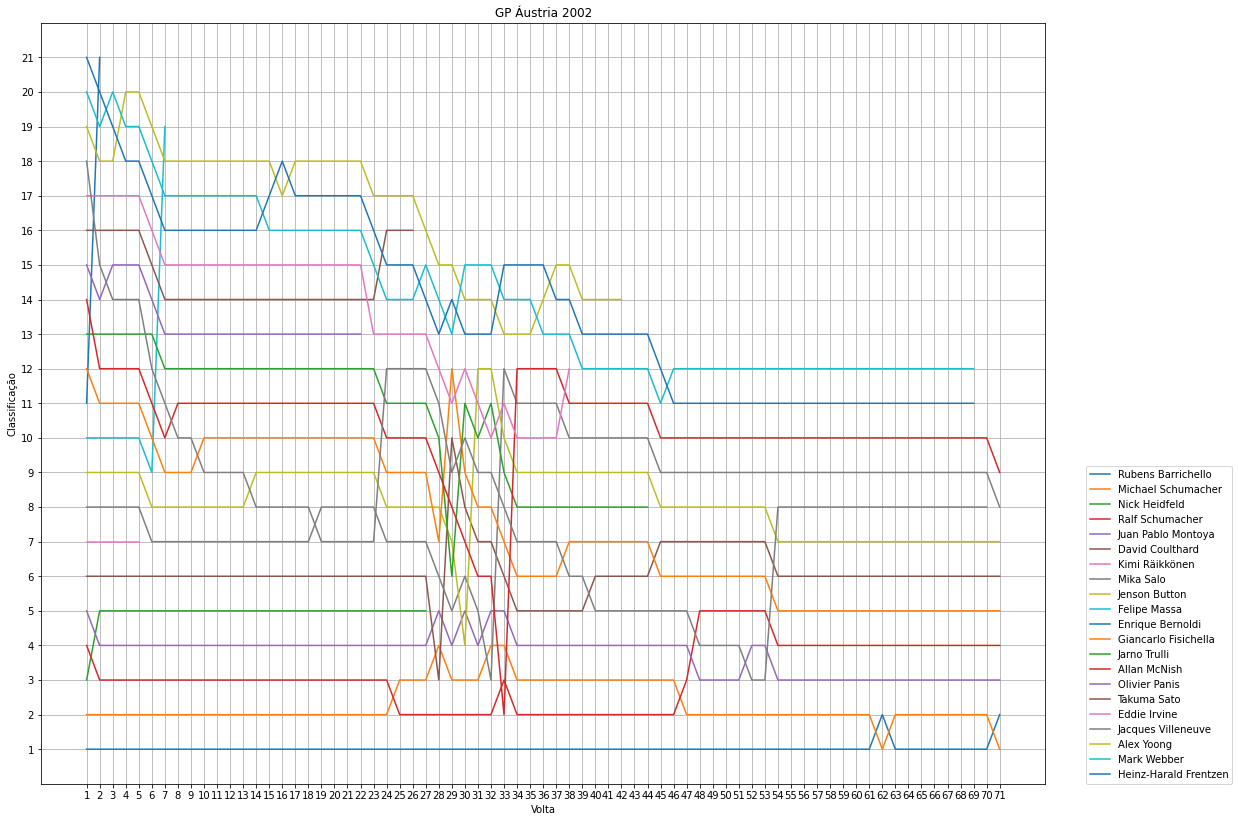

In [ ]:
# Hoje não, Hoje não, Hoje sim
raceId = corridas.select('raceID').filter((col('name') == 'Austrian Grand Prix') & (col('year') == 2002)).collect()[0][0]
gpAustria = tempoVoltas.filter(col('raceId') == raceId) \
                     .join(pilotos, pilotos.driverId == tempoVoltas.driverId, 'inner') \
                     .select('forename', 'surname', 'lap', 'position', 'milliseconds') \
                     .orderBy('lap', 'position')

x = {}
y = {}

for registro in gpAustria.collect():
  piloto = registro[0] + ' ' + registro[1]
  if piloto in x:
    x[piloto].append(registro[2])
  else: 
    x[piloto] = [registro[2]]

  if piloto in y:
    y[piloto].append(registro[3])
  else: 
    y[piloto] = [registro[3]]
  
for piloto in x:
  plt.plot(x[piloto], y[piloto], label = piloto)

plt.xlabel('Volta')
plt.ylabel('Classificação')
plt.title('GP Áustria 2002')
plt.legend(loc=(1.04,0))
plt.xticks(range(1, 72, 1))
plt.yticks(range(1, 22, 1))
plt.rcParams["figure.figsize"] = (18,14)
plt.grid(True)
plt.show()

***Rubens Barrichello e Michael Schumacher no GP Áustria 2002***

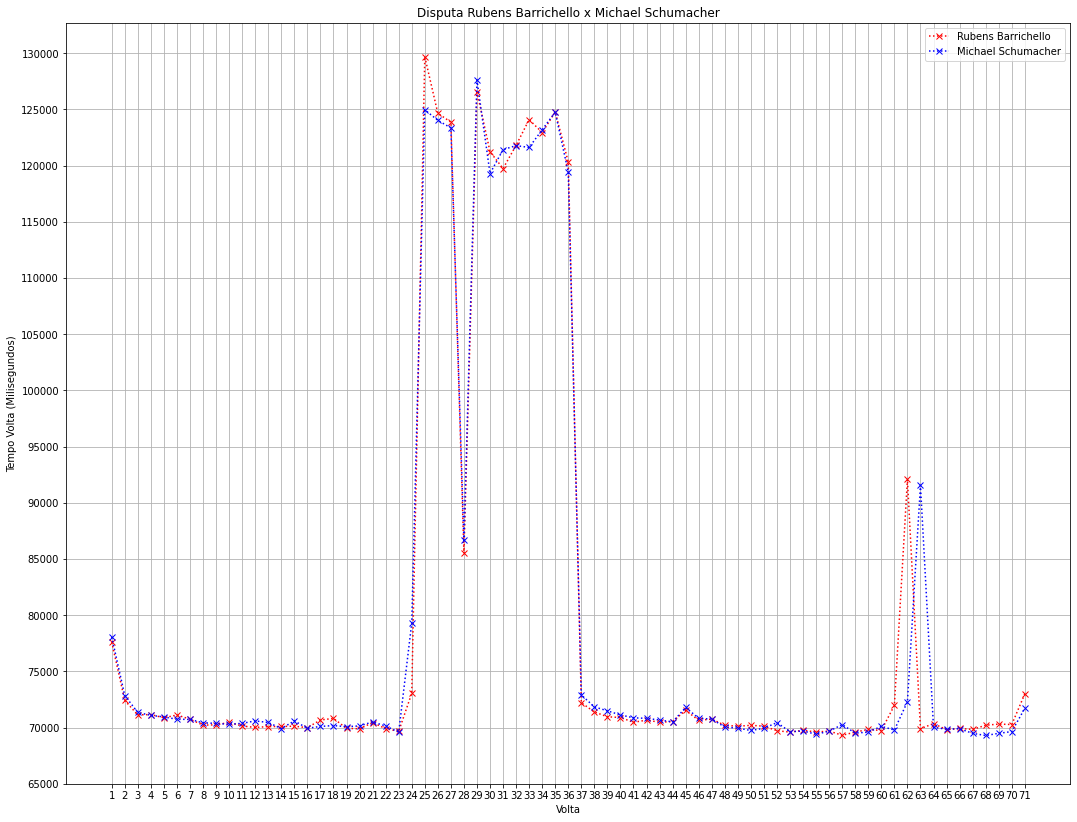

In [ ]:
# Tempo Voltas
schumacherId = pilotos.filter((col('forename') == 'Michael') & (col('surname') == 'Schumacher')).select('driverId').collect()[0][0]
rubbensId = pilotos.filter((col('forename') == 'Rubens') & (col('surname') == 'Barrichello')).select('driverId').collect()[0][0]
raceId = corridas.select('raceId').filter((col('name') == 'Austrian Grand Prix') & (col('year') == 2002)).collect()[0][0]

desempenhoRubens = tempoVoltas.filter((col('raceId') == raceId) & (col('driverId') == rubbensId)) \
                              .join(pilotos, tempoVoltas.driverId == pilotos.driverId, "inner") \
                              .select('lap', 'milliseconds')

desempenhoSchumacher = tempoVoltas.filter((col('raceId') == raceId) & (col('driverId') == schumacherId)) \
                                  .join(pilotos, tempoVoltas.driverId == pilotos.driverId, "inner") \
                                  .select('lap', 'milliseconds')

x1 = desempenhoRubens.select('lap').rdd.flatMap(lambda x: x).collect()
x2 = desempenhoSchumacher.select('lap').rdd.flatMap(lambda x: x).collect()
y1 = desempenhoRubens.select('milliseconds').rdd.flatMap(lambda y: y).collect()
y2 = desempenhoSchumacher.select('milliseconds').rdd.flatMap(lambda y: y).collect()

plt.plot(x1, y1, 'x:r', label = "Rubens Barrichello")
plt.plot(x2, y2, 'x:b', label = "Michael Schumacher")
plt.xlabel('Volta')
plt.ylabel('Tempo Volta (Milisegundos)')
plt.title('Disputa Rubens Barrichello x Michael Schumacher')
plt.xticks(range(1, 72, 1))
plt.yticks(range(65000, 131000, 5000))
plt.legend()
plt.rcParams["figure.figsize"] = (18,14)
plt.grid(True)
plt.show()

***Rubens Barrichello: GP Hungria 2010***

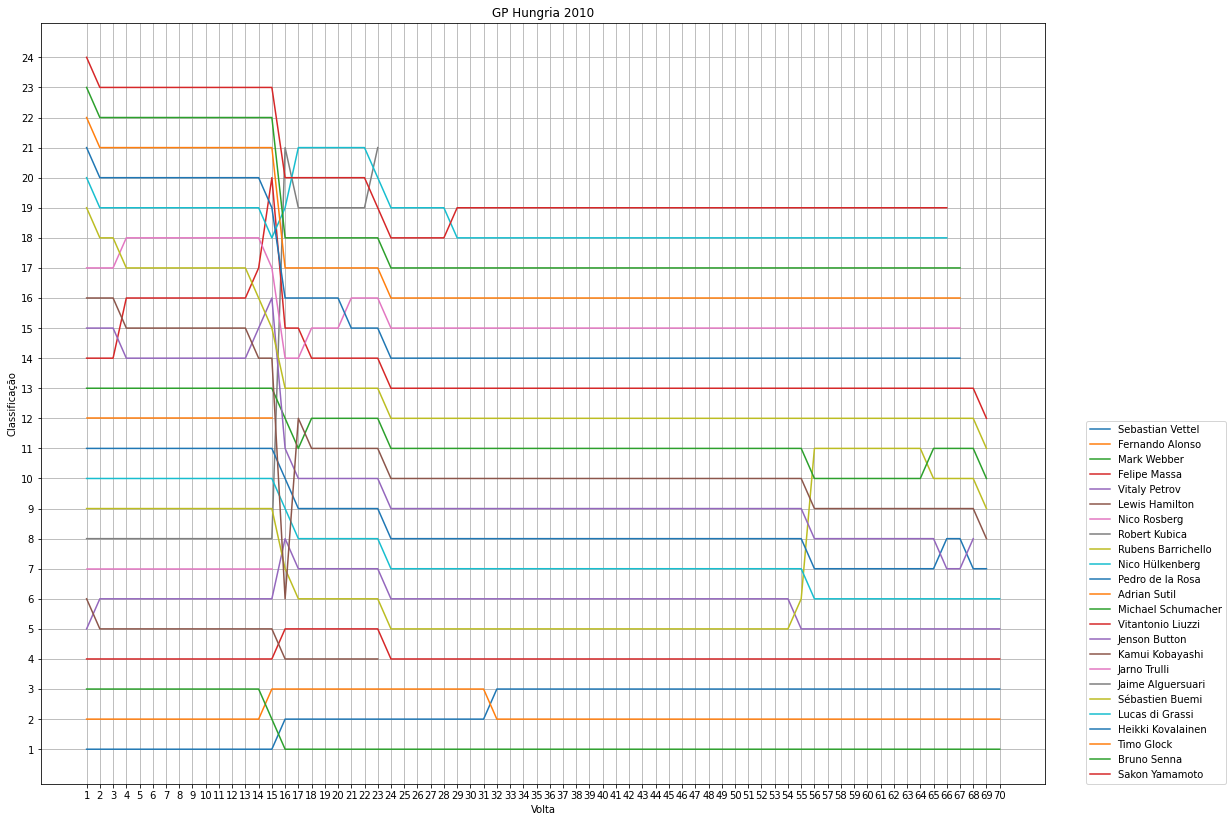

In [ ]:
# Ultrapassagem Rubens X Schumacher
raceId = corridas.select('raceID').filter((col('name') == 'Hungarian Grand Prix') & (col('year') == 2010)).collect()[0][0]
gpAustria = tempoVoltas.filter(col('raceId') == raceId) \
                     .join(pilotos, pilotos.driverId == tempoVoltas.driverId, 'inner') \
                     .select('forename', 'surname', 'lap', 'position', 'milliseconds') \
                     .orderBy('lap', 'position')

x = {}
y = {}

for registro in gpAustria.collect():
  piloto = registro[0] + ' ' + registro[1]
  if piloto in x:
    x[piloto].append(registro[2])
  else: 
    x[piloto] = [registro[2]]

  if piloto in y:
    y[piloto].append(registro[3])
  else: 
    y[piloto] = [registro[3]]
  
for piloto in x:
  plt.plot(x[piloto], y[piloto], label = piloto)

plt.xlabel('Volta')
plt.ylabel('Classificação')
plt.title('GP Hungria 2010')
plt.legend(loc=(1.04,0))
plt.xticks(range(1, 71, 1))
plt.yticks(range(1, 25, 1))
plt.rcParams["figure.figsize"] = (18,14)
plt.grid(True)
plt.show()

***Rubens Barrichello e Michael Schumacher no GP Hungria 2010***

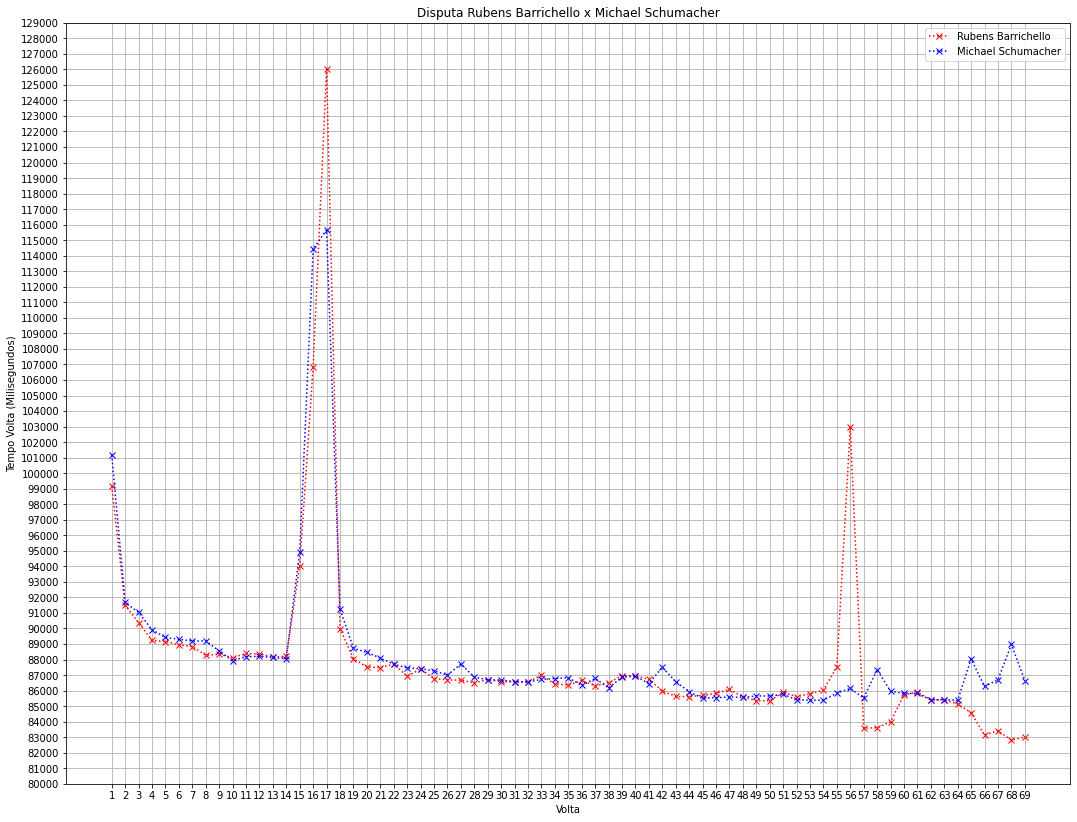

In [ ]:
# Tempo Voltas
schumacherId = pilotos.filter((col('forename') == 'Michael') & (col('surname') == 'Schumacher')).select('driverId').collect()[0][0]
rubbensId = pilotos.filter((col('forename') == 'Rubens') & (col('surname') == 'Barrichello')).select('driverId').collect()[0][0]
raceId = corridas.select('raceId').filter((col('name') == 'Hungarian Grand Prix') & (col('year') == 2010)).collect()[0][0]

desempenhoRubens = tempoVoltas.filter((col('raceId') == raceId) & (col('driverId') == rubbensId)) \
                              .join(pilotos, tempoVoltas.driverId == pilotos.driverId, "inner") \
                              .select('lap', 'milliseconds')

desempenhoSchumacher = tempoVoltas.filter((col('raceId') == raceId) & (col('driverId') == schumacherId)) \
                                  .join(pilotos, tempoVoltas.driverId == pilotos.driverId, "inner") \
                                  .select('lap', 'milliseconds')

x1 = desempenhoRubens.select('lap').rdd.flatMap(lambda x: x).collect()
x2 = desempenhoSchumacher.select('lap').rdd.flatMap(lambda x: x).collect()
y1 = desempenhoRubens.select('milliseconds').rdd.flatMap(lambda y: y).collect()
y2 = desempenhoSchumacher.select('milliseconds').rdd.flatMap(lambda y: y).collect()

plt.plot(x1, y1, 'x:r', label = "Rubens Barrichello")
plt.plot(x2, y2, 'x:b', label = "Michael Schumacher")
plt.xlabel('Volta')
plt.ylabel('Tempo Volta (Milisegundos)')
plt.title('Disputa Rubens Barrichello x Michael Schumacher')
plt.xticks(range(1, 70, 1))
plt.yticks(range(80000, 130000, 1000))
plt.legend()
plt.rcParams["figure.figsize"] = (18,14)
plt.grid(True)
plt.show()

# ***Equipes***

***Classificação Equipes 1950 - 2021***

In [ ]:
# Histórico
queryEquipesCampeoes = """
                           SELECT ano,
                                  equipe,
                                  nacionalidade,
                                  pontuacao,
                                  ROW_NUMBER() OVER(PARTITION BY ano ORDER BY pontuacao DESC) AS classificacao
                           FROM 
                           (
                                SELECT  year AS ano, 
                                        C.name AS equipe,
                                        C.nationality AS nacionalidade,
                                        SUM(points) AS pontuacao
                                FROM tempConstrutoresResultados A
                                INNER JOIN tempCorridas B
                                ON A.raceId = B.raceId
                                INNER JOIN tempConstrutores C
                                ON A.constructorId = C.constructorId 
                                GROUP BY year, C.name, C.nationality
                           )
                           ORDER BY nacionalidade, ano, classificacao
                       """

classificacaoEquipes = spark.sql(queryEquipesCampeoes)
classificacaoEquipes.show()

+----+------------+-------------+---------+-------------+
| ano|      equipe|nacionalidade|pontuacao|classificacao|
+----+------------+-------------+---------+-------------+
|1959|      Watson|     American|      8.0|            4|
|1959|    Lesovsky|     American|      5.0|            6|
|1959|     Epperly|     American|      3.0|            7|
|1959|Kurtis Kraft|     American|      0.0|           10|
|1959|       Elder|     American|      0.0|           12|
|1959|    Phillips|     American|      0.0|           15|
|1959| Christensen|     American|      0.0|           17|
|1959|        Dunn|     American|      0.0|           18|
|1959|      Sutton|     American|      0.0|           22|
|1959|       Kuzma|     American|      0.0|           24|
|1959|       Moore|     American|      0.0|           26|
|1960|      Watson|     American|      8.0|            5|
|1960|     Epperly|     American|      4.0|            6|
|1960|    Phillips|     American|      3.0|            8|
|1960|    Leso

***Históricos Ferrari***

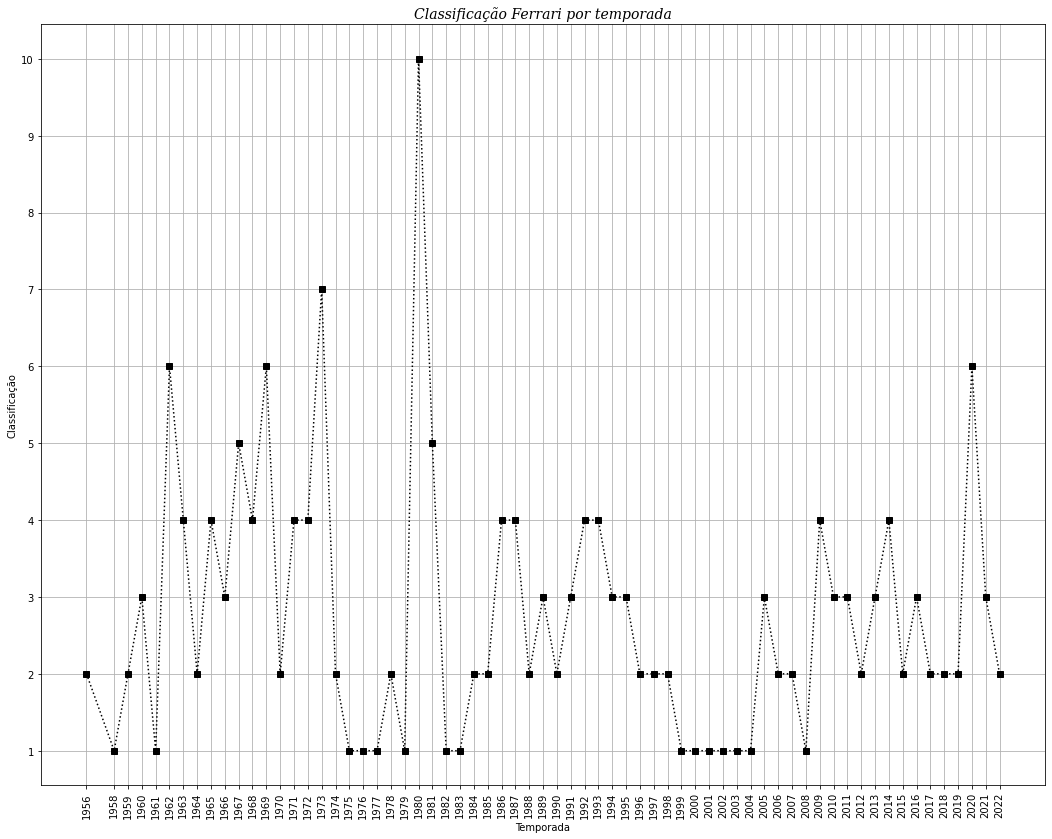

In [ ]:
# Histórico Ferrari 
ferrari = classificacaoEquipes.filter((col('equipe') == 'Ferrari'))

x = ferrari.select('ano').rdd.flatMap(lambda y: y).collect()
y = ferrari.select('classificacao').rdd.flatMap(lambda y: y).collect()

plt.plot(x, y, 's:k')
plt.xlabel('Temporada')
plt.ylabel('Classificação')
plt.title('Classificação Ferrari por temporada', fontdict=fonteTitulo)
plt.xticks(x, rotation=90)
plt.yticks(range(1, 11, 1))
plt.rcParams["figure.figsize"] = (18,14)
plt.grid(True)
plt.show()

***Equipes brasileiras***

In [ ]:
# Brasil
equipesBrasileiras = classificacaoEquipes.filter((col('nacionalidade') == 'Brazilian'))
equipesBrasileiras.show()

+----+----------+-------------+---------+-------------+
| ano|    equipe|nacionalidade|pontuacao|classificacao|
+----+----------+-------------+---------+-------------+
|1975|Fittipaldi|    Brazilian|      0.0|           17|
|1976|Fittipaldi|    Brazilian|      3.0|           11|
|1977|Fittipaldi|    Brazilian|     11.0|            9|
|1978|Fittipaldi|    Brazilian|     17.0|            7|
|1979|Fittipaldi|    Brazilian|      1.0|           13|
|1980|Fittipaldi|    Brazilian|     11.0|            9|
|1981|Fittipaldi|    Brazilian|      0.0|           15|
|1982|Fittipaldi|    Brazilian|      1.0|           13|
+----+----------+-------------+---------+-------------+



***Histórico Fittipaldi***

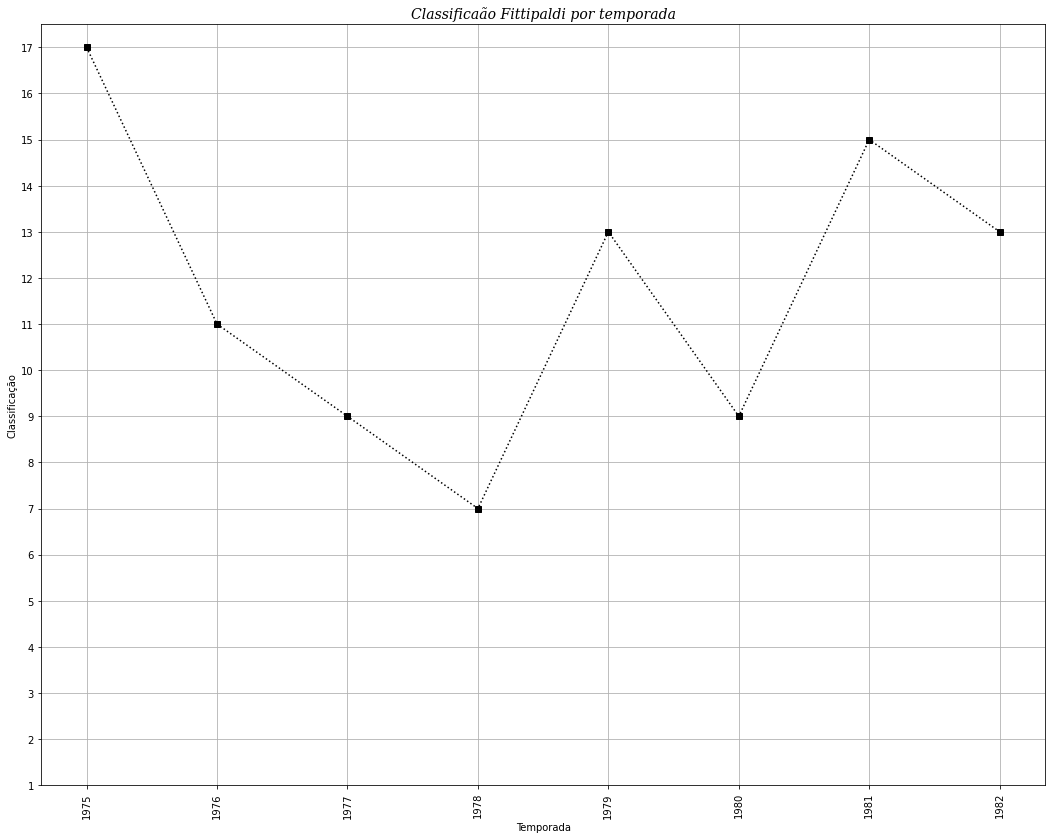

In [ ]:
# Histórico Fittipald
x = equipesBrasileiras.select('ano').rdd.flatMap(lambda y: y).collect()
y = equipesBrasileiras.select('classificacao').rdd.flatMap(lambda y: y).collect()

plt.plot(x, y, 's:k')
plt.xlabel('Temporada')
plt.ylabel('Classificação')
plt.title('Classificaão Fittipaldi por temporada', fontdict=fonteTitulo)
plt.xticks(x, rotation=90)
plt.yticks(range(1, 18, 1))
plt.rcParams["figure.figsize"] = (18,14)
plt.grid(True)
plt.show()

***Pilotos Ferrari***

In [ ]:
# Pilotos
queryPilotosFerrari =  """
                           SELECT temporada, piloto, classificacao
                           FROM 
                           (
                              SELECT temporada,
                                     pilotoId,
                                     piloto,
                                     ROW_NUMBER() OVER(PARTITION BY temporada ORDER BY total_pontos DESC) AS classificacao
                              FROM tempPontosPilotos 
                           )
                           WHERE pilotoId IN
                           (
                              SELECT driverId
                              FROM tempResultados A
                              INNER JOIN tempConstrutores B
                              ON (A.constructorId = B.constructorId AND B.name = 'Ferrari')
                           )
                           ORDER BY temporada DESC, classificacao DESC
                       """
pilotosFerrari = spark.sql(queryPilotosFerrari)
pilotosFerrari.show()

+---------+----------------+-------------+
|temporada|          piloto|classificacao|
+---------+----------------+-------------+
|     2022|Sebastian Vettel|           13|
|     2022| Fernando Alonso|           10|
|     2022|    Carlos Sainz|            5|
|     2022| Charles Leclerc|            2|
|     2021|  Kimi Räikkönen|           17|
|     2021|Sebastian Vettel|           12|
|     2021| Fernando Alonso|           10|
|     2021|    Carlos Sainz|            7|
|     2021| Charles Leclerc|            6|
|     2020|  Kimi Räikkönen|           17|
|     2020|Sebastian Vettel|           13|
|     2020|    Carlos Sainz|            9|
|     2020| Charles Leclerc|            4|
|     2019|  Kimi Räikkönen|            9|
|     2019|    Carlos Sainz|            7|
|     2019| Charles Leclerc|            5|
|     2019|Sebastian Vettel|            4|
|     2018| Charles Leclerc|           15|
|     2018|    Carlos Sainz|           11|
|     2018| Fernando Alonso|            8|
+---------+

***Pilotos Fittipaldi***

In [ ]:
# Pilotos
queryPilotosFittipaldi =  """
                              SELECT temporada, piloto, classificacao
                              FROM 
                              (
                                  SELECT temporada,
                                        pilotoId,
                                        piloto,
                                        ROW_NUMBER() OVER(PARTITION BY temporada ORDER BY total_pontos DESC) AS classificacao
                                  FROM tempPontosPilotos 
                              )
                              WHERE pilotoId IN
                              (
                                  SELECT driverId
                                  FROM tempResultados A
                                  INNER JOIN tempConstrutores B
                                  ON (A.constructorId = B.constructorId AND B.name = 'Fittipaldi')
                              )
                              ORDER BY temporada DESC, classificacao DESC
                          """
pilotosFittipaldi = spark.sql(queryPilotosFittipaldi)
pilotosFittipaldi.show()

+---------+------------------+-------------+
|temporada|            piloto|classificacao|
+---------+------------------+-------------+
|     1986|      Keke Rosberg|            5|
|     1985|      Keke Rosberg|            5|
|     1984|      Keke Rosberg|            6|
|     1983|       Chico Serra|           29|
|     1983|      Keke Rosberg|            5|
|     1982|       Chico Serra|           23|
|     1982|      Keke Rosberg|            4|
|     1981|       Chico Serra|           35|
|     1981|      Keke Rosberg|           33|
|     1980|Emerson Fittipaldi|           11|
|     1980|      Keke Rosberg|           10|
|     1979|      Alex Ribeiro|           28|
|     1979|      Keke Rosberg|           24|
|     1979|   Arturo Merzario|           22|
|     1979|Emerson Fittipaldi|           18|
|     1978|      Keke Rosberg|           41|
|     1978|   Arturo Merzario|           38|
|     1978|Emerson Fittipaldi|            8|
|     1977|      Alex Ribeiro|           43|
|     1977

***Valocidade Ferrari***

In [ ]:
# Velocidade
queryVelocidadeFerrari = """
                              SELECT fastestLap AS melhorVolta,
                                     fastestLapSpeed AS melhorMediaVelocidade,
                                     fastestLapTime AS melhorTempo,
                                     A.milliseconds,
                                     C.name AS GP, 
                                     C.date AS data
                              FROM tempResultados A
                              INNER JOIN tempConstrutores B
                              ON (A.constructorId = B.constructorId AND B.name = 'Ferrari')
                              INNER JOIN  tempCorridas C
                              ON A.raceId = C.raceId 
                              WHERE fastestLapSpeed > 0
                              ORDER BY C.date DESC
                         """

velocidadeFerrari = spark.sql(queryVelocidadeFerrari)
velocidadeFerrari.show()

+-----------+---------------------+-----------+------------+--------------------+-------------------+
|melhorVolta|melhorMediaVelocidade|melhorTempo|milliseconds|                  GP|               data|
+-----------+---------------------+-----------+------------+--------------------+-------------------+
|         48|              211.901|   1:29.719|     5274685|Abu Dhabi Grand Prix|2022-11-20 00:00:00|
|         50|              213.904|   1:28.879|     5290806|Abu Dhabi Grand Prix|2022-11-20 00:00:00|
|         65|              209.760|   1:13.953|     5918095|Brazilian Grand Prix|2022-11-13 00:00:00|
|         63|              208.912|   1:14.253|     5922485|Brazilian Grand Prix|2022-11-13 00:00:00|
|         32|              188.498|   1:22.199|     5974852|Mexico City Grand...|2022-10-30 00:00:00|
|         48|              187.576|   1:22.603|     5985503|Mexico City Grand...|2022-10-30 00:00:00|
|         37|              199.003|   1:39.731|     6139188|United States Gra...|2

***Extensão em Km dos GPs***

In [ ]:
# Km GPs
velocidadeFerrari.createOrReplaceTempView("tempVelocidadesFerrari")

queryKMGPs = """
                SELECT GP, 
                       KM
                FROM 
                (
                    SELECT DISTINCT GP,
                                    ROUND(AVG((melhorMediaVelocidade * (milliseconds / (60 * 60 * 1000)))), 2) AS KM
                    FROM tempVelocidadesFerrari
                    GROUP BY GP
                )
                WHERE KM IS NOT NULL
                ORDER BY GP
             """

gp = spark.sql(queryKMGPs)
gp.show()

+--------------------+------+
|                  GP|    KM|
+--------------------+------+
|70th Anniversary ...|314.03|
|Abu Dhabi Grand Prix|318.43|
|Australian Grand ...|324.82|
| Austrian Grand Prix|322.82|
|Azerbaijan Grand ...|384.57|
|  Bahrain Grand Prix|321.19|
|  Belgian Grand Prix|333.72|
|Brazilian Grand Prix| 331.0|
|  British Grand Prix|356.47|
| Canadian Grand Prix|339.58|
|  Chinese Grand Prix|321.68|
|    Dutch Grand Prix|332.52|
|    Eifel Grand Prix|328.88|
|Emilia Romagna Gr...|388.94|
| European Grand Prix| 325.1|
|   French Grand Prix|320.78|
|   German Grand Prix|322.65|
|Hungarian Grand Prix| 324.1|
|   Indian Grand Prix|318.04|
|  Italian Grand Prix|320.66|
+--------------------+------+
only showing top 20 rows



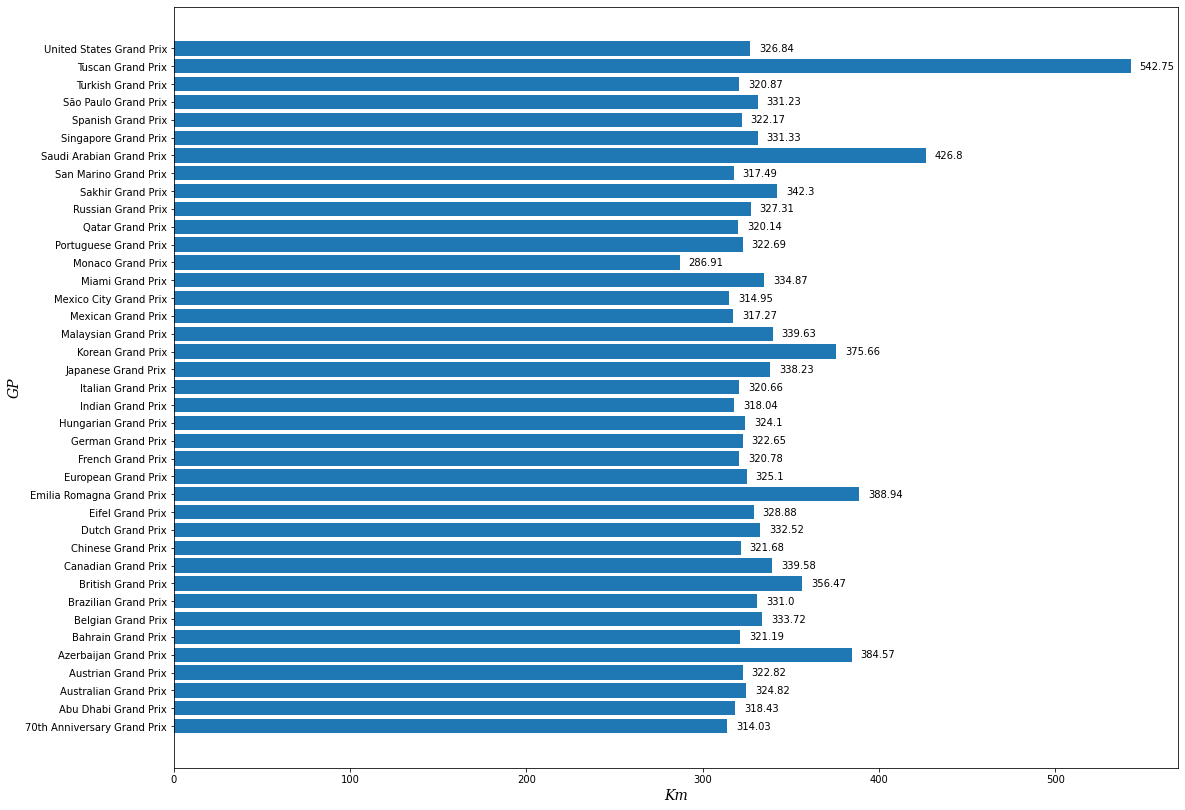

In [ ]:
# Visualização
x = gp.select('GP').rdd.flatMap(lambda y: y).collect()
y = gp.select('KM').rdd.flatMap(lambda y: y).collect()

plt.barh(x, y)
plt.xlabel('Km', fontdict=fonteTitulo)
plt.ylabel('GP', fontdict=fonteTitulo)
plt.rcParams["figure.figsize"] = (18,14)

for i, v in enumerate(y):
    plt.text(v+5, i, str(round(v, 2)), color='black', va="center")

plt.show()